In [3]:
import sys
sys.path.append('../')  # Adiciona o diretório pai ao PATH (se necessário)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("../databases/students_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Visualizando informações gerais:

In [5]:
# Dicionário para armazenar os valores únicos
unique_values = {}

# Loop através de todas as colunas do DataFrame
for column in df.drop("StudentID", axis=1).columns:
    unique_values[column] = df[column].unique()

# Exibir os valores únicos de cada coluna
for column, values in unique_values.items():
    print(f'Coluna {column}: {values}')

Coluna Age: [17 18 15 16]
Coluna Gender: [1 0]
Coluna Ethnicity: [0 2 1 3]
Coluna ParentalEducation: [2 1 3 4 0]
Coluna StudyTimeWeekly: [19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
Coluna Absences: [ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
Coluna Tutoring: [1 0]
Coluna ParentalSupport: [2 1 3 4 0]
Coluna Extracurricular: [0 1]
Coluna Sports: [0 1]
Coluna Music: [1 0]
Coluna Volunteering: [0 1]
Coluna GPA: [2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]
Coluna GradeClass: [2. 1. 4. 3. 0.]


In [6]:
for column in df.drop(["StudentID", "StudyTimeWeekly", "GPA"], axis=1).columns:
        lista_item = df[column].unique()
        dicionario_porcentagem = {}

        for item in lista_item:
            dicionario_porcentagem[item] = df[df[column] == item].shape[0]


        total = len(df)

        print(f"\nPORCENTAGEM EM {column.upper()}")
        for item in lista_item:
            porcentagem = (dicionario_porcentagem[item] / total) * 100
            print(f"Porcentagem de {str(item).upper()}: {porcentagem:.2f}%")


PORCENTAGEM EM AGE
Porcentagem de 17: 24.54%
Porcentagem de 18: 24.33%
Porcentagem de 15: 26.34%
Porcentagem de 16: 24.79%

PORCENTAGEM EM GENDER
Porcentagem de 1: 51.09%
Porcentagem de 0: 48.91%

PORCENTAGEM EM ETHNICITY
Porcentagem de 0: 50.46%
Porcentagem de 2: 19.65%
Porcentagem de 1: 20.61%
Porcentagem de 3: 9.28%

PORCENTAGEM EM PARENTALEDUCATION
Porcentagem de 2: 39.05%
Porcentagem de 1: 30.43%
Porcentagem de 3: 15.34%
Porcentagem de 4: 5.02%
Porcentagem de 0: 10.16%

PORCENTAGEM EM ABSENCES
Porcentagem de 7: 3.60%
Porcentagem de 0: 2.80%
Porcentagem de 26: 3.34%
Porcentagem de 14: 3.51%
Porcentagem de 17: 3.39%
Porcentagem de 10: 2.55%
Porcentagem de 22: 2.97%
Porcentagem de 1: 3.55%
Porcentagem de 11: 2.97%
Porcentagem de 15: 3.64%
Porcentagem de 21: 3.47%
Porcentagem de 9: 2.80%
Porcentagem de 16: 3.30%
Porcentagem de 29: 2.88%
Porcentagem de 2: 2.88%
Porcentagem de 25: 3.89%
Porcentagem de 20: 3.76%
Porcentagem de 5: 3.47%
Porcentagem de 8: 3.80%
Porcentagem de 12: 3.85%
Po

In [7]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

### Limpando os Dados

Verificando o tamanho:

In [8]:
df.shape

(2392, 15)

In [9]:
df = df.dropna()
df.shape

(2392, 15)

**Logo, não existe valores nulos!**

Ao analisar, não há muito o que ser tratado. O dado já veio bem tratado!

### Separação entre X(features) e y(target)

In [10]:
X = df.drop(['StudentID', 'GradeClass'], axis=1)
y = df["GradeClass"] 

### Dividir o X(features) e y(target) em conjuntos de **treino** e **teste**

In [11]:
# Dividir o conjunto de dados em treinamento e um conjunto teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Verificando (des)balanceamento de Classe:**

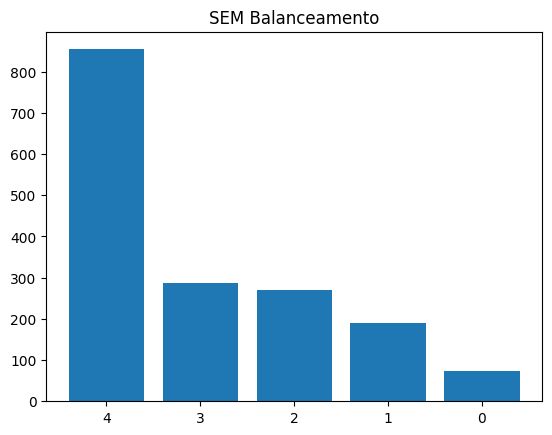

In [12]:
#gráfico de barras para verificar o balanceamento
plt.bar(['4', '3', '2', '1', '0'], y_train.value_counts())
plt.title('SEM Balanceamento')
plt.show()

**Aplicar SMOTE e ENN para balanceamento das classes:**

In [13]:
# Ajustar ENN para ser menos agressivo
smote_enn = SMOTEENN(sampling_strategy="all", random_state=42, enn=EditedNearestNeighbours(n_neighbors=5))
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

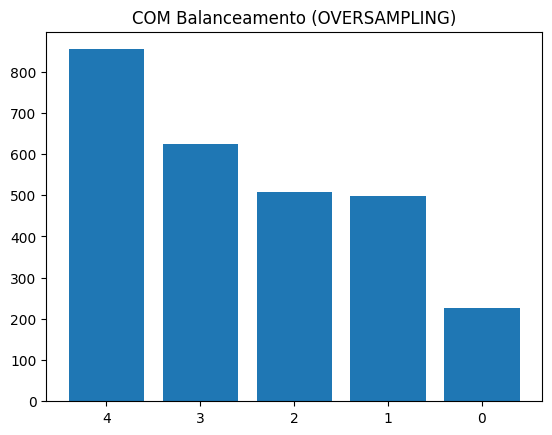

In [14]:
#gráfico de barras para verificar o balanceamento
plt.bar(['4', '3', '2', '1', '0'], y_train.value_counts())
plt.title('COM Balanceamento (OVERSAMPLING)')
plt.show()

In [15]:
# Aplicar RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

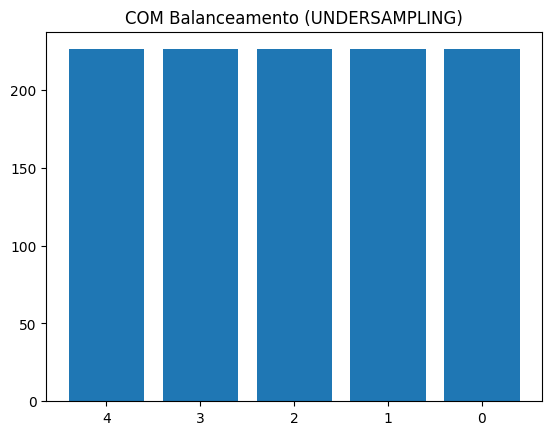

In [16]:
#gráfico de barras para verificar o balanceamento
plt.bar(['4', '3', '2', '1', '0'], y_train.value_counts())
plt.title('COM Balanceamento (UNDERSAMPLING)')
plt.show()

## Usando **RandomForest**

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Exibir resultados
print(f'Acurácia média: {scores.mean()}')
print(f'Desvio padrão da acurácia: {scores.std()}')

Acurácia média: 0.9548672566371682
Desvio padrão da acurácia: 0.010982012076098072


In [20]:
y_pred = cross_val_predict(model, X_train, y_train, cv=kfold)

In [21]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92       226
         1.0       0.97      0.97      0.97       226
         2.0       0.94      0.98      0.96       226
         3.0       0.95      0.96      0.96       226
         4.0       0.94      0.98      0.96       226

    accuracy                           0.95      1130
   macro avg       0.96      0.95      0.95      1130
weighted avg       0.96      0.95      0.95      1130



**Matriz de Confusão:**

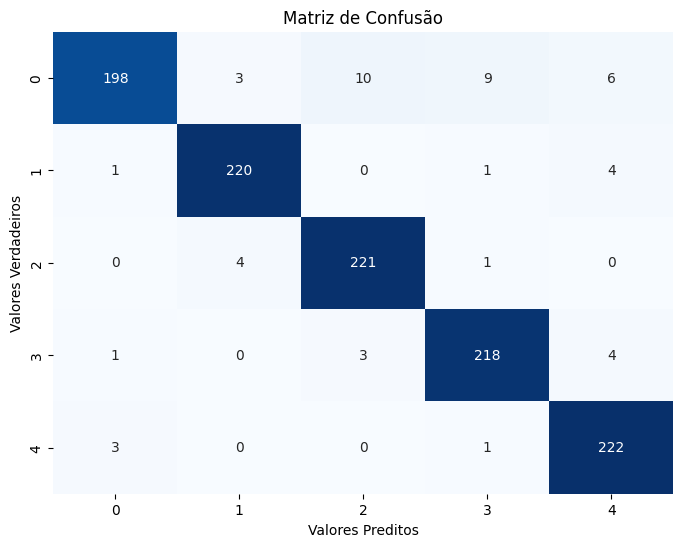

In [22]:
# Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

## Salvando modelo (persistência)
Para uso em produção, considere salvar o modelo treinado usando joblib ou pickle para que possa ser carregado e usado para previsões futuras sem precisar ser treinado novamente.

In [24]:
# Import
import joblib

# Salvar modelo
joblib.dump(model, '../model/students_model_random_forest.pkl')

['../model/students_model_random_forest.pkl']